# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. 

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. 

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. 
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 


Ваша задача — провести анализ и подготовить план действий по удержанию клиентов. 
А именно: 
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами: 
1. выделить целевые группы клиентов;
2. предложить меры по снижению оттока;
3. пределить другие особенности взаимодействия с клиентами.

# Данные

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
1. Данные клиента за предыдущий до проверки факта оттока месяц: 
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

2. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: 
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.


# Ход работы:
[1. Импорт библиотек. Загрузка датасета](#import)

[2. Исследовательский анализ данных (EDA)](#eda)

[2.1. Предобработка](#eda)

[2.2. Распределение признаков](#features)

[2.3. Корреляция. Heatmap](#correlation)

[3. Постройте модель прогнозирования оттока клиентов](#model)

[3.1. Логистическая регрессия](#logistic)

[3.2. Random Forest](#random)

[3.3. CatBoost](#catboost)

[3.4. Вывод: метрики](#metrics)

[4. Кластеризация клиентов](#cluster)

[4. Вывод](#conclusion)

[Рекомендации](#recomend)

<a id="import"> </a>
# 1. Импорт библиотек. Загрузка датасета

In [1]:
! pip install phik

     |████████████████████████████████| 679 kB 2.5 MB/s eta 0:00:01


In [47]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})

import phik
import itertools

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
gym.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Большая часть переменных - бинарные категориальные.

<a id="eda"> </a>
# 2. Исследовательский анализ данных (EDA)
# 2.1. Предобработка

In [5]:
gym.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
print(gym.duplicated().sum())

gym = gym.drop_duplicates ()

0


В имеющемся датасете 4000 строк, 14 столбцов. 

Пропущенных значений - нет. Явных дубликатов - нет.

Для работы с регрессиями необходимо стандартизировать признаки.

Типы данных соответствуют действительности. Необходимо изменить стиль написания с pascal case на snake case.

In [8]:
gym.columns = [column.lower() for column in gym.columns]

<a id="features"> </a>
# 2.2. Распределение признаков

In [9]:
# проверим выборку на сбалансированность

gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Имеющаяся выборка - несбалансированная: объектов класса 0 почти в три раза больше, чем класса 1 (активных пользователей больше, чем ушедших)

In [10]:
# изучим средние значения признаков

gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Беглый взгляд на средние значения ушедших клиентов подсказывает нам, что:
1. соотношение мужчин и женщин - практически поровну;
2. клиенты реже проживают рядом с спортзалом;
3. клиенты реже покупают абонемент в рамках акции «приведи друга» и реже являются сотрудниками компании-партнёра клуба;
4. реже покупают абонементы на длительные периоды времени, реже посещают спортзал и реже, чем активные пользвователи, посещают групповые занятия;
5. меньше тратят на кафе, спорттовары, косметический и массажный салон. 

Средние значения возраста, наличия контактного телефона практически совпадают в обоих группах.

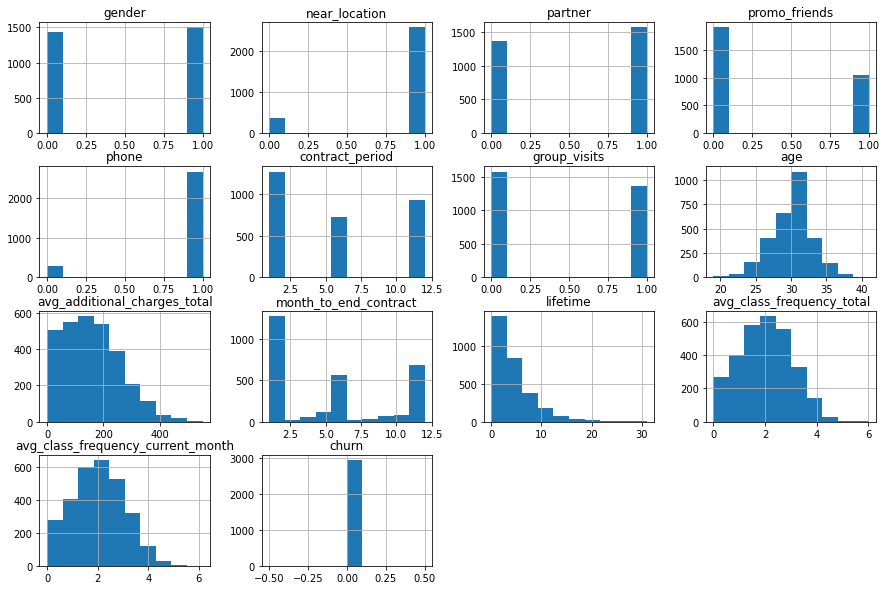

In [11]:
# построим гистограмму распределения признаков (churn = 0)

gym[gym['churn']==0].hist(figsize=(15,10), grid=True);

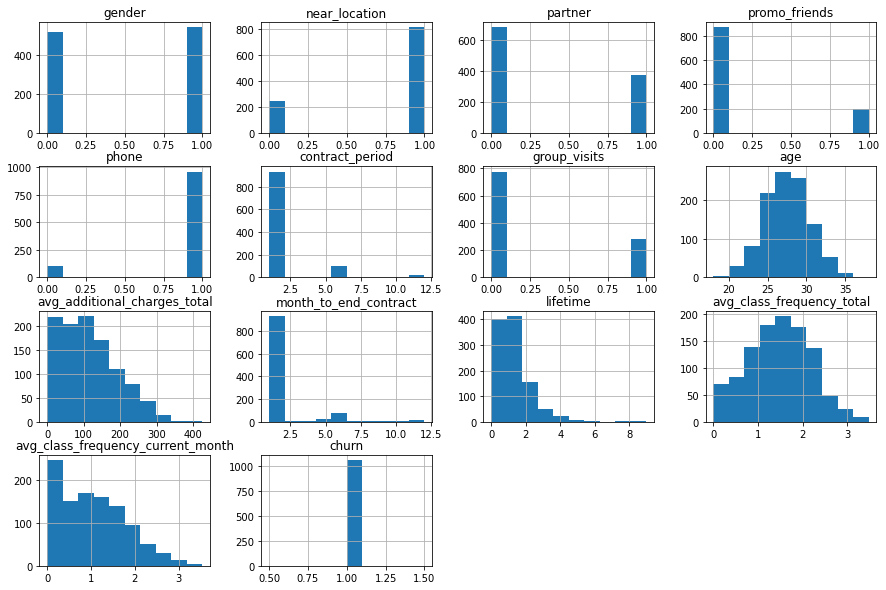

In [12]:
# построим гистограмму распределения признаков (churn = 1)

gym[gym['churn']==1].hist(figsize=(15,10), grid=True);

Визуальное подтверждение распредления средних значений признаков:
ушедшие клиенты покупали обычно абонемент на месяц, ходили один раз в неделю  и неохотно тратились на доп. услуги.

<a id="correlation"> </a>
# 2.3. Корреляция. Heatmap

In [13]:
gym_corr = round(gym.corr(), 2)

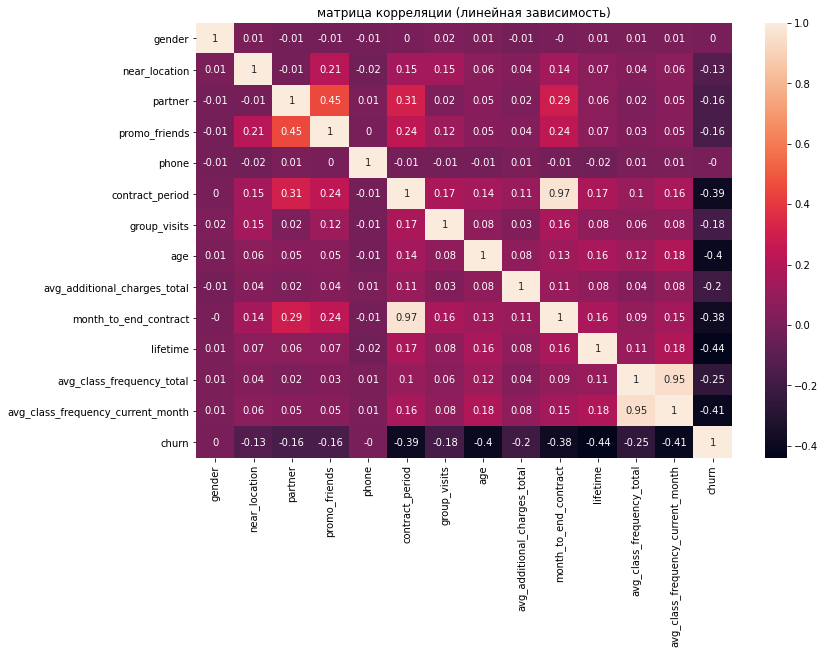

In [14]:
# визуализируем матрицу корреляции

plt.subplots(figsize=(12, 8))
sns.heatmap(gym_corr, annot=True)
plt.title('матрица корреляции (линейная зависимость)');

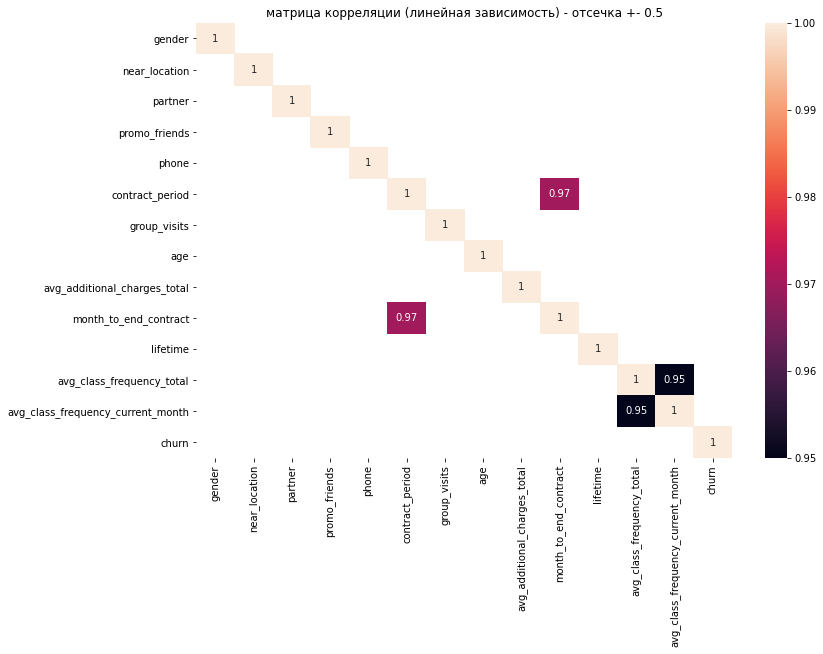

In [15]:
# "подсветим" переменные с сильной корреляцией

plt.subplots(figsize=(12, 8))
sns.heatmap((gym_corr[abs(gym_corr) > 0.5]), annot=True)
plt.title('матрица корреляции (линейная зависимость) - отсечка +- 0.5');

Матрица показывают слабую корреляцию признаков между собой. Сильно коррелируют признаки:
- 'month_to_end_contract' и 'contract_period',
- 'avg_class_frequency_total и 'avg_class_frequency_current_month'.
Для дальнейшей работы по одному из сильно скоррелированных признаков нужно удалить из выборки.

Остальные переменные слабо коррелируют между собой, либо зависимость переменных нелинейна.

In [16]:
gym_phik = round(gym.phik_matrix(), 2)

interval columns not set, guessing: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']


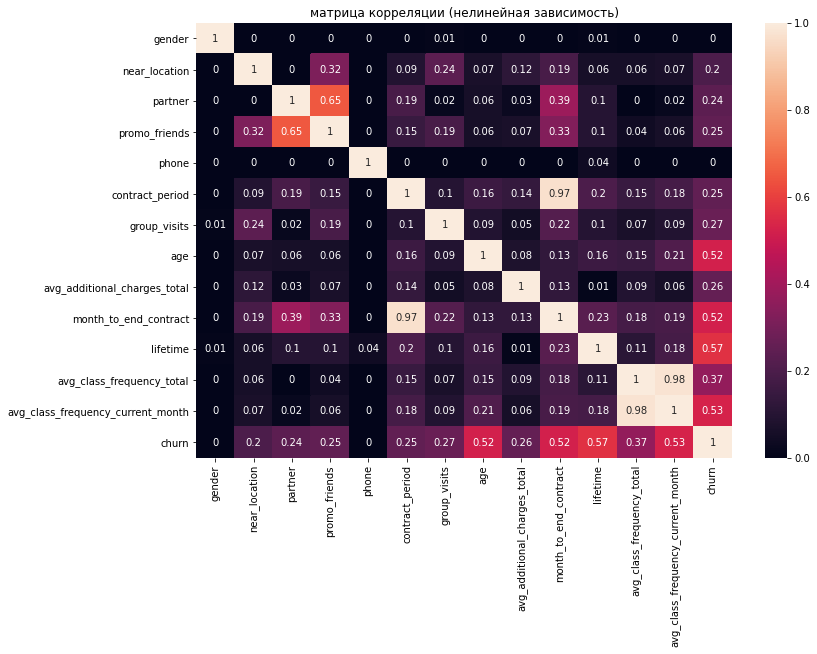

In [17]:
plt.subplots(figsize=(12, 8))
sns.heatmap(gym_phik, annot=True)
plt.title('матрица корреляции (нелинейная зависимость)');

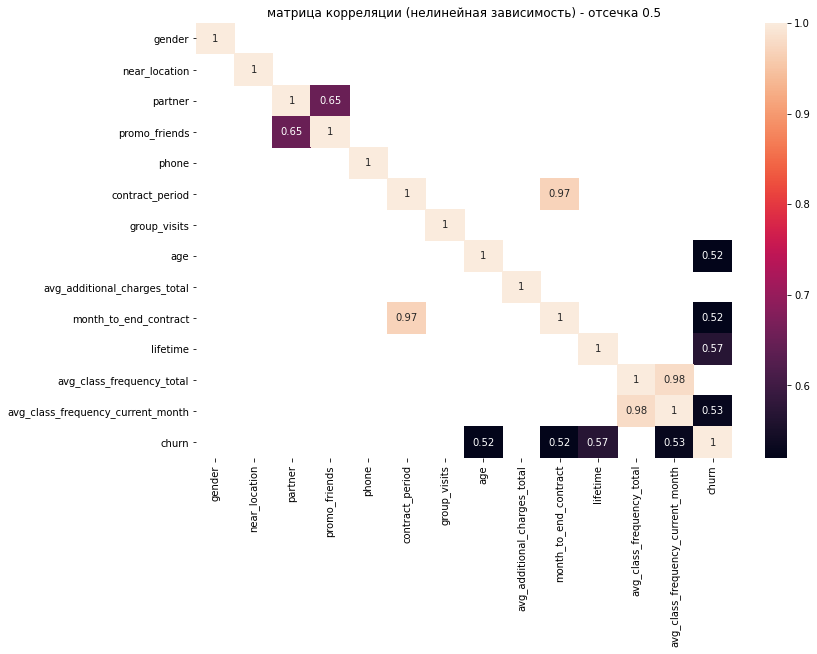

In [18]:
# "подсветим" переменные с сильной корреляцией

plt.subplots(figsize=(12, 8))
sns.heatmap((gym_phik[gym_phik > 0.5]), annot=True)
plt.title('матрица корреляции (нелинейная зависимость) - отсечка 0.5');

Часть переменных коррелируется между собой, но их зависимость нелинейна.

Phik-корреляция подтвердила, что переменные month_to_end_contract и contract_period, avg_class_frequency_total и avg_class_frequency_current_month зависимы между собой (> 0.9).

Так же она поймала зависимость между 'partner' и 'promo_friends'.


С целевой переменной 'churn' коррелируют:
- 'age',
- 'month_to_end_contract',
- 'lifetime'
- и 'avg_class_frequency_current_month'.

<a id="model"> </a>
# 3. Постройте модель прогнозирования оттока клиентов

В шаге 2.3 мы делили переменные, которые сильно коррелируют между собой (коэфициент корреляции более 0.9):
- contact_period и month_to_end_contact (0.97),
- avg_class_frequency_current_month и avg_class_frequency_total (0.98).

В дальнейшем, мы не будем использовать переменные contact_period и avg_class_frequency_total.

Разделим данные на обучающую и тестовую выборку, стандартизируем признаки.

Обучим три модели:
- логистическую регрессию,
- RandomForestClassifier
- и CatBoostClassifier - метод, основанный на градиентном бустинге.

In [19]:
X = gym.drop(gym.columns[[5,11,13]], axis=1)
y = gym['churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# стандартизируем данные для работы с лолгистической регрессией

scaler = StandardScaler() 

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<a id="logistic"> </a>
# 3.1. Логистическая регрессия

In [24]:
lr_model = LogisticRegression(solver='liblinear', random_state=0)

In [25]:
lr_model.fit(X_train_st, y_train)

predictions_lr = lr_model.predict(X_test_st)

<a id="random"> </a>
# 3.2. Random Forest

Random forest как и CatBoost одинаково хорошо работает и со стандартизированными данными и с не стандартитзированными, поэтому оставим X_train_st и X_test_st.

In [26]:
rf_model = RandomForestClassifier(random_state=0)

In [27]:
rf_model.fit(X_train_st, y_train)

predictions_rf = rf_model.predict(X_test_st)

<a id="catboost"> </a>
# 3.3. CatBoost

In [28]:
cat = CatBoostClassifier(random_state=0, verbose=100)

In [29]:
cat.fit(X_train_st, y_train)

predictions_cat = cat.predict(X_test_st)

Learning rate set to 0.016929
0:	learn: 0.6719010	total: 48ms	remaining: 48s
100:	learn: 0.2154179	total: 201ms	remaining: 1.79s
200:	learn: 0.1827144	total: 364ms	remaining: 1.45s
300:	learn: 0.1671757	total: 499ms	remaining: 1.16s
400:	learn: 0.1561798	total: 630ms	remaining: 941ms
500:	learn: 0.1461716	total: 764ms	remaining: 761ms
600:	learn: 0.1364792	total: 909ms	remaining: 604ms
700:	learn: 0.1285430	total: 1.06s	remaining: 451ms
800:	learn: 0.1215479	total: 1.22s	remaining: 302ms
900:	learn: 0.1152060	total: 1.36s	remaining: 150ms
999:	learn: 0.1094276	total: 1.5s	remaining: 0us


<a id="metrics"> </a>
# 3.4. Вывод: метрики

In [30]:
probability_lr = lr_model.predict_proba(X_test_st)[:,1]

print('Метрики для логистической регрессии:')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions_lr)))
print('Precision: {:.3f}'.format(precision_score(y_test, predictions_lr)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_lr)))
print('F1 score: {:.3f}'.format(f1_score(y_test, predictions_lr)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, probability_lr)))

Метрики для логистической регрессии:
Accuracy: 0.902
Precision: 0.791
Recall: 0.823
F1 score: 0.807
ROC AUC: 0.963


In [31]:
probability_rf = rf_model.predict_proba(X_test_st)[:,1]

print('Метрики для RandomForest Classifier:')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions_rf)))
print('Precision: {:.3f}'.format(precision_score(y_test, predictions_rf)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_rf)))
print('F1 score: {:.3f}'.format(f1_score(y_test, predictions_rf)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, probability_rf)))

Метрики для RandomForest Classifier:
Accuracy: 0.905
Precision: 0.824
Recall: 0.783
F1 score: 0.803
ROC AUC: 0.948


In [32]:
probability_cat = cat.predict_proba(X_test_st)[:,1]

print('Метрики для CatBoost Classifier:')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions_cat)))
print('Precision: {:.3f}'.format(precision_score(y_test, predictions_cat)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_cat)))
print('F1 score: {:.3f}'.format(f1_score(y_test, predictions_cat)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, probability_cat)))

Метрики для CatBoost Classifier:
Accuracy: 0.904
Precision: 0.801
Recall: 0.813
F1 score: 0.807
ROC AUC: 0.958


Самая высокая доля правильных ответов (accuracy) у случайного леса, чуть хуже показали себя модели логистической регрессии и Catboost. Но мы помним об изначальном дисбалансе классов (класс 0 и класс 1 - 3 к 1), поэтому будем ориентироваться на оставшиеся метрики.

На имеющихся данных модель логистической регресии показала себя лучше всего (Recall: 0.823, F1 score: 0.807, ROC AUC: 0.963), следом за ней идет CatBoost Classifier (Recall: 0.813, F1 score: 0.807, ROC AUC: 0.958) и RandomForest Classifier (Recall: 0.783, F1 score: 0.803, ROC AUC: 0.948).

<a id="cluster"> </a>
# 4. Кластеризация клиентов

In [28]:
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

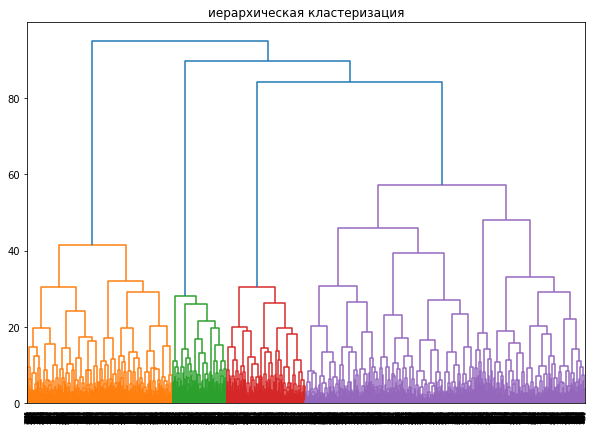

CPU times: user 1min 33s, sys: 21.3 s, total: 1min 55s
Wall time: 1min 55s


In [34]:
%%time

plt.figure(figsize=(10, 7))  
dendrogram(linked, orientation='top')
plt.title('иерархическая кластеризация')
plt.show() 

In [26]:
km = KMeans(n_clusters=5, random_state=0) 

In [29]:
labels = km.fit_predict(X_sc) 

In [30]:
gym['cluster_label'] = labels

In [31]:
# проанализируем средние значения по кластерам

cluster_mean = gym.groupby('cluster_label').mean().reset_index()
cluster_mean

,cluster_label,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.492000,0.994000,0.953000,1.000000,0.906000,7.346000,0.528000,29.633000,154.086252,6.730000,4.287000,1.960141,1.919105,0.108000
1,1,0.495352,0.998672,0.378486,0.046481,0.903054,5.059761,0.000000,30.342629,174.392898,4.698539,5.166003,2.240956,2.237272,0.046481
2,2,0.511194,1.000000,0.226368,0.114428,0.899254,1.802239,0.182836,26.807214,111.073289,1.715174,1.420398,1.327204,0.978977,0.741294
3,3,0.502455,0.000000,0.489362,0.072013,0.913257,2.996727,0.232406,28.700491,137.375245,2.826514,3.027823,1.768079,1.599583,0.400982
4,4,0.550481,0.998798,0.274038,0.075721,0.897837,5.155048,1.000000,30.248798,155.206260,4.707933,4.483173,2.068666,2.043261,0.092548


In [32]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        x=df[x_name], y=df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [33]:
col_pairs = list(itertools.combinations(gym.drop(gym.columns[[5,11,14]], axis=1).columns, 2))

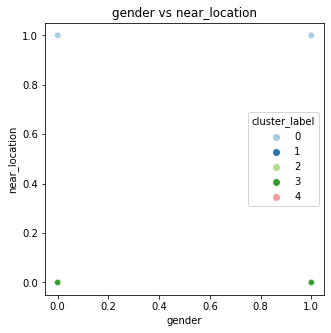

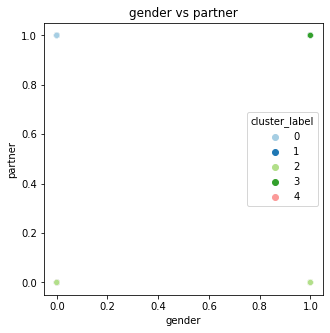

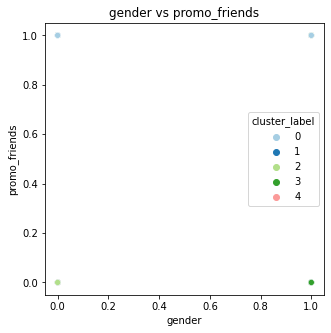

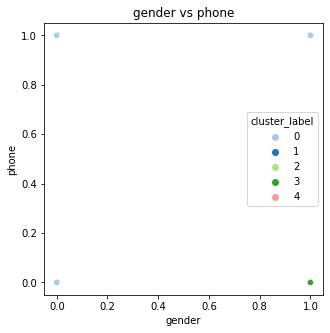

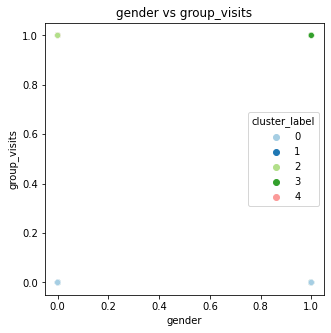

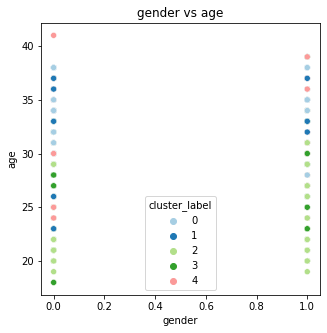

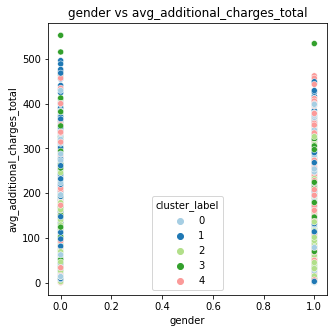

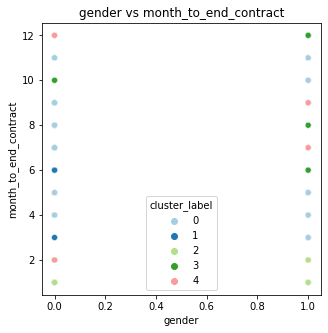

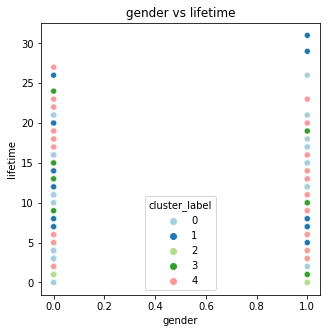

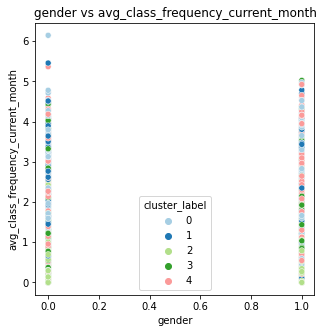

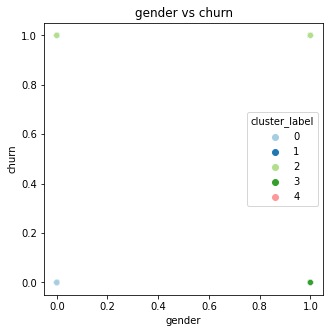

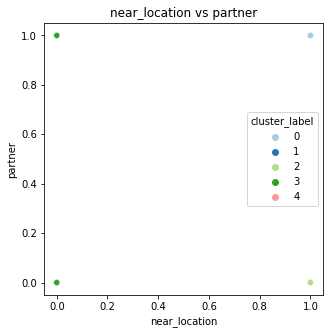

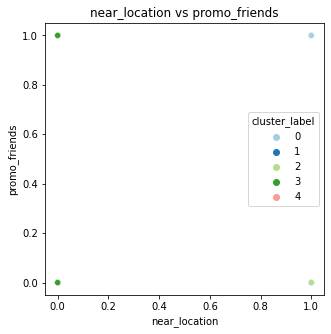

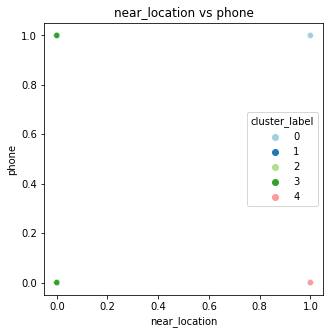

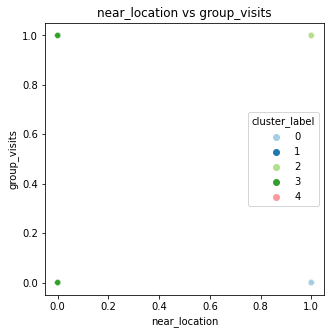

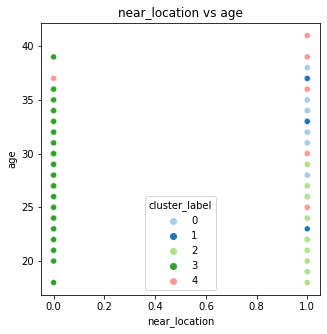

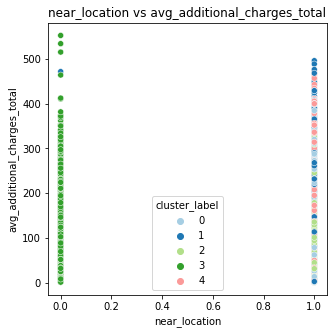

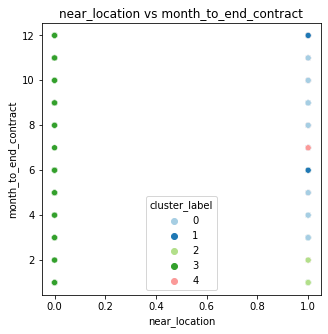

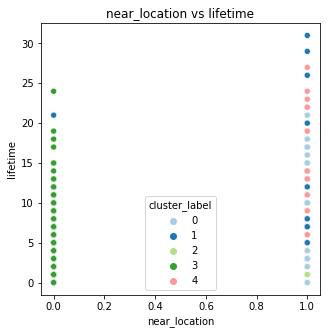

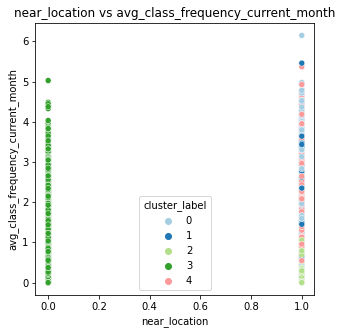

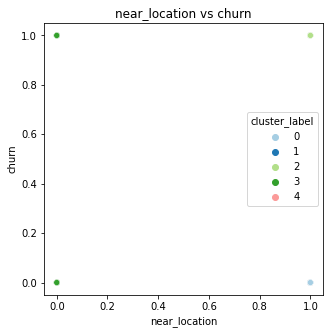

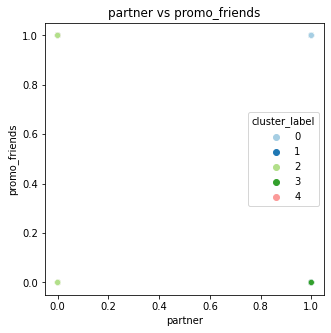

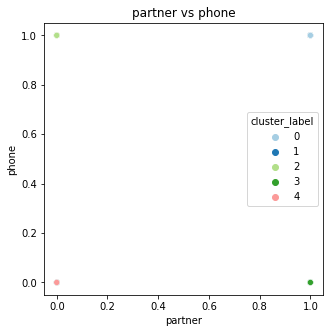

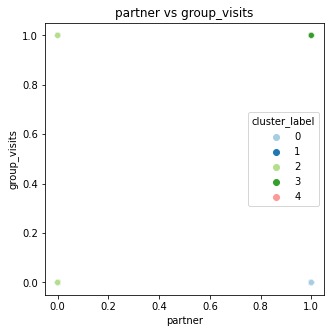

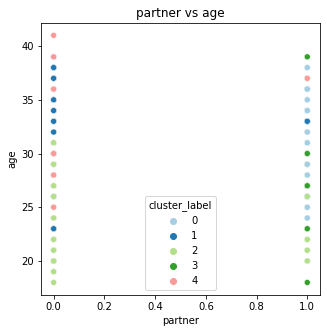

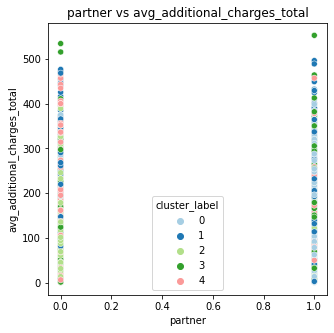

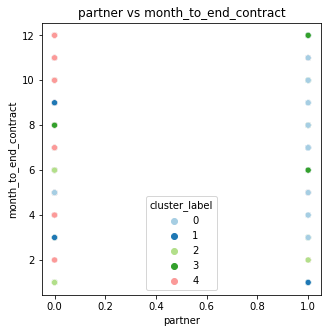

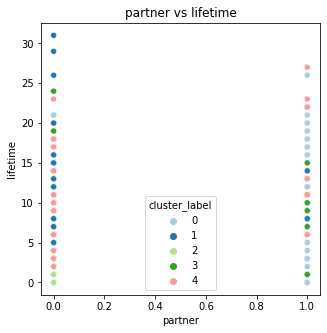

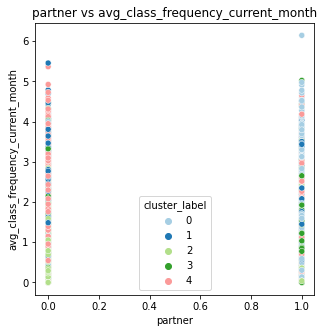

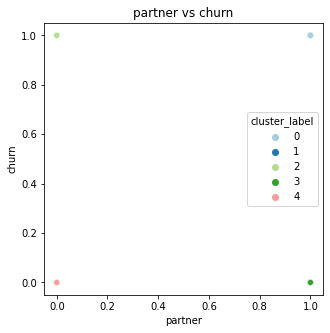

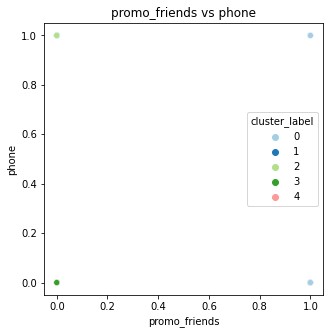

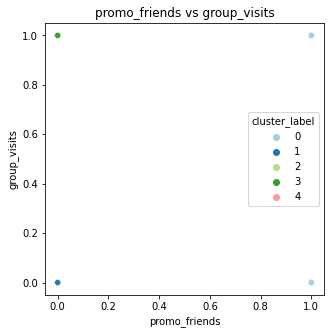

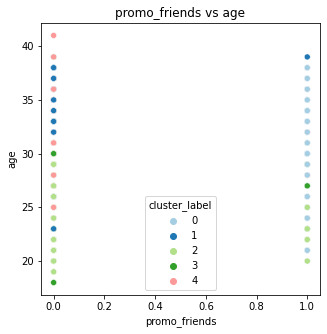

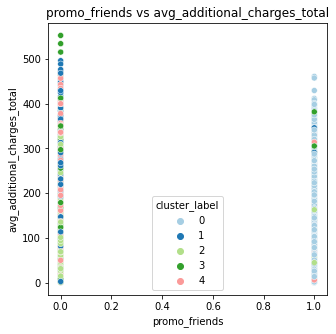

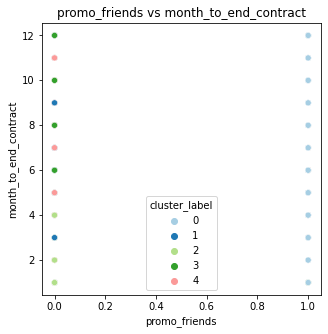

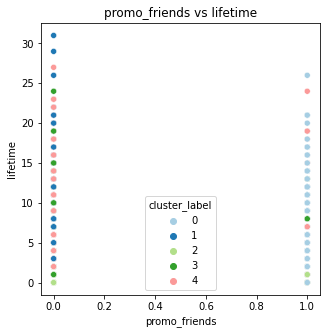

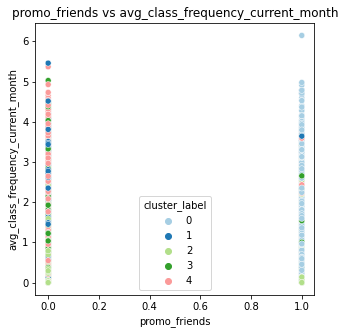

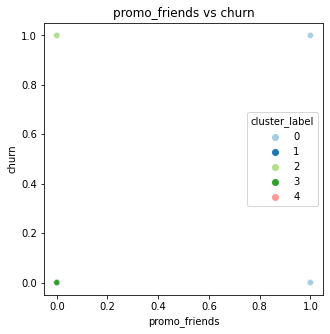

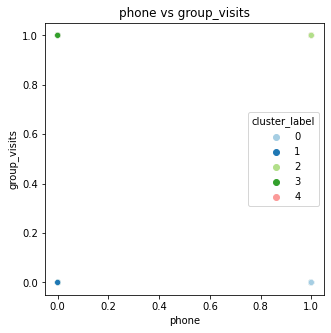

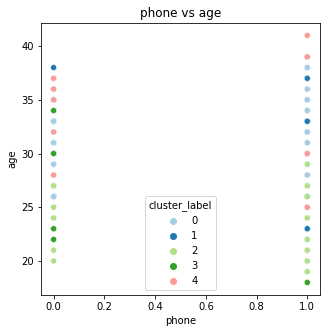

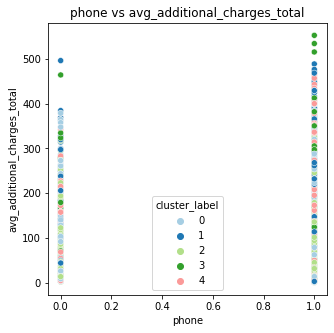

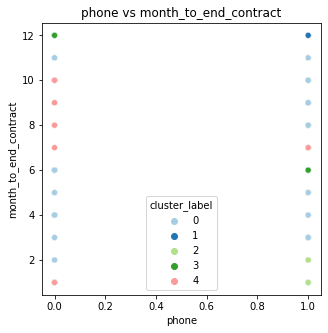

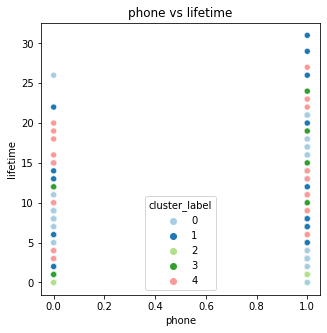

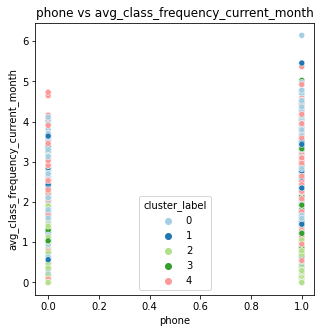

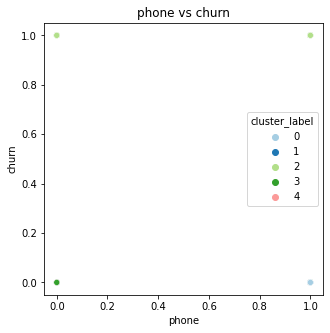

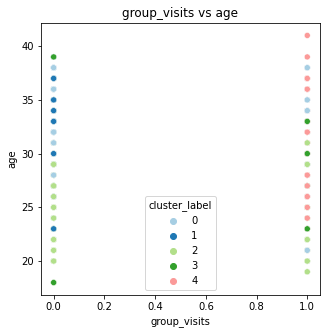

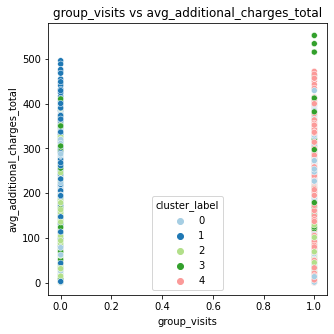

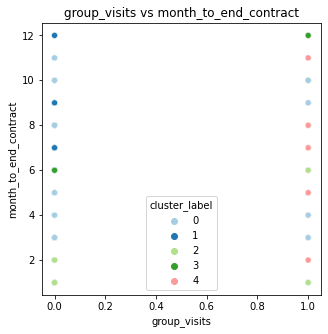

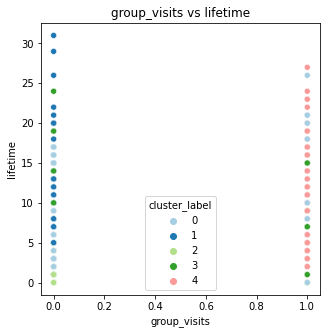

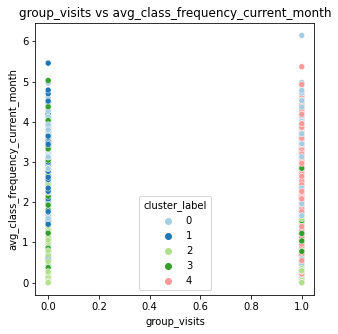

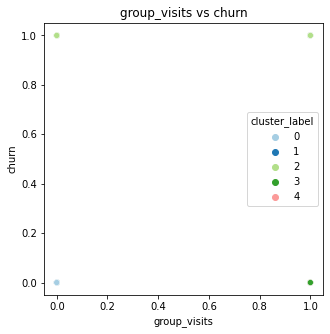

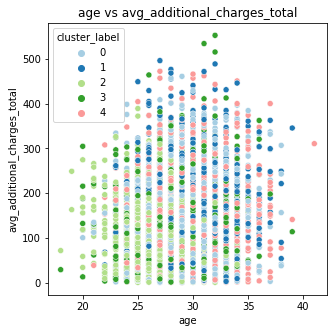

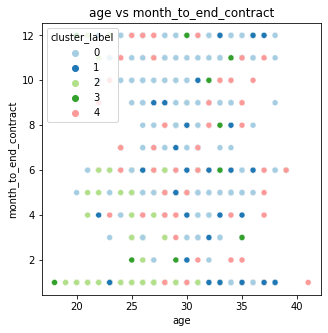

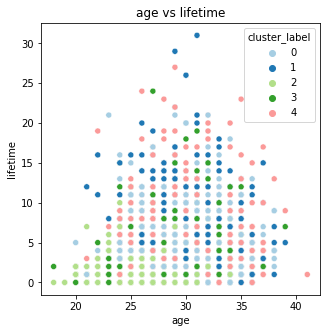

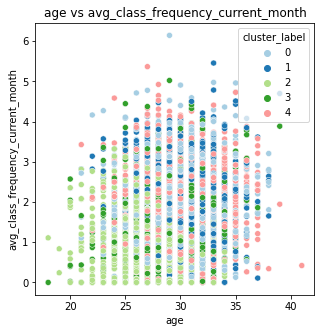

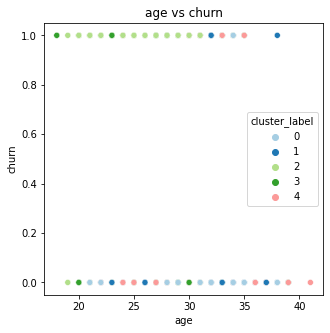

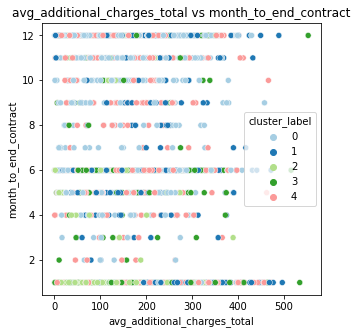

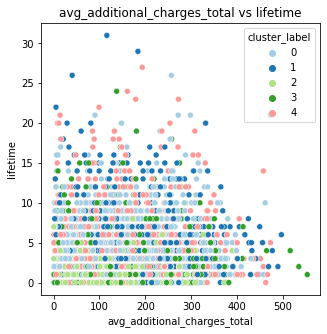

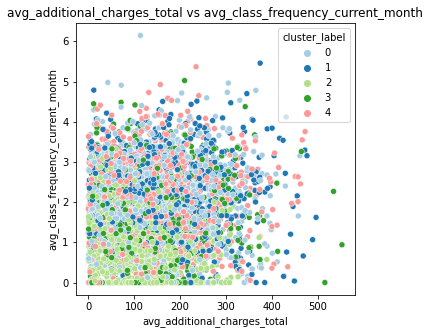

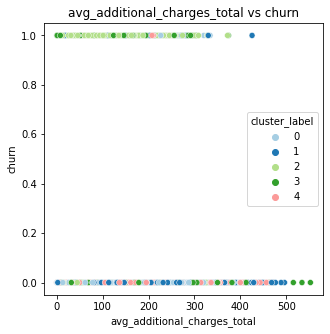

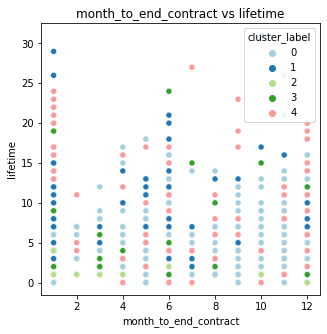

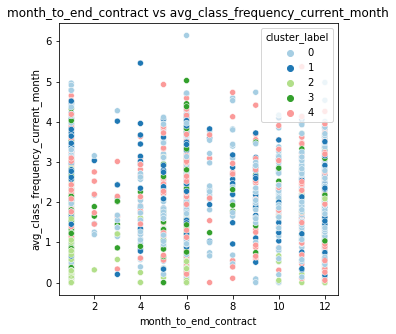

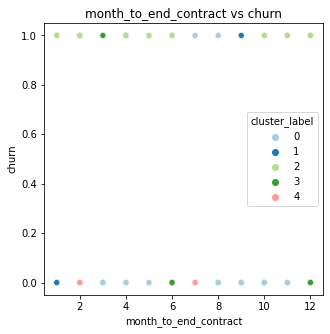

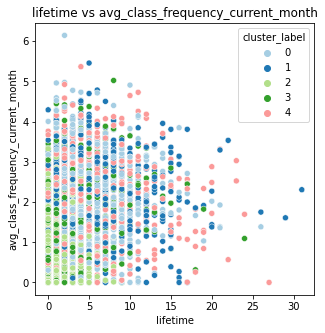

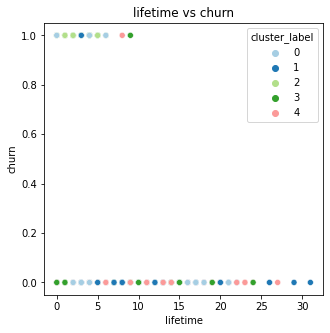

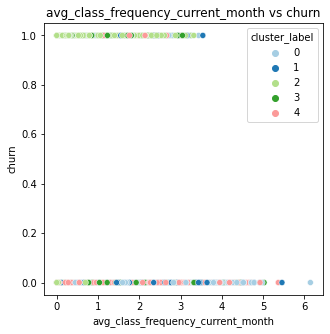

In [34]:
# построим графики попарного сочетания признаков

for pair in col_pairs:
    show_clusters_on_plot(gym, pair[0], pair[1], 'cluster_label')

затрудняюсь сказать что-то дельное об этом.

Мы поистроили дендрограмму, демонстрирующую иерархическую кластеризацию клиентов нашего спортзала - в зависимости от варианта "обрезки" можно выделить от 4 до 7 кластеров. Согласно условиям проекта, мы выделяем 5 кластеров.


Самые "отточные" кластеры - 2 и 3, на наших графиках они обозначены светло-зеленым и темно-зелеными цветами.

В этих двух кластерах женщин больше, чем мужчин. В остальных кластерах - либо поровну, либо мужчин больше, чем женщин. 

Так же эти два кластера покупают самые непродолжительные по времени абонементы, реже всех посещают групповые занятия и меньше всего тратят на доп. услуги.

In [64]:
def show_clusters_on_displot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.displot(data=gym, x=pair[0], y=pair[1], hue='cluster_label', palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

<Figure size 360x360 with 0 Axes>

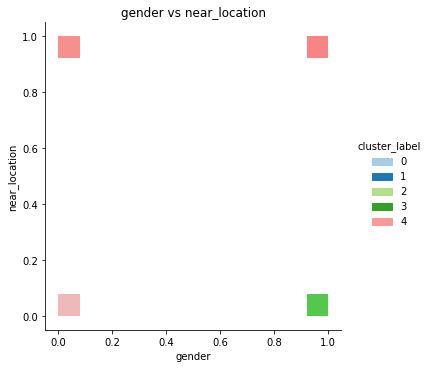

<Figure size 360x360 with 0 Axes>

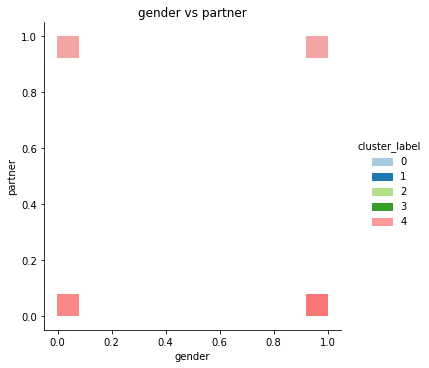

<Figure size 360x360 with 0 Axes>

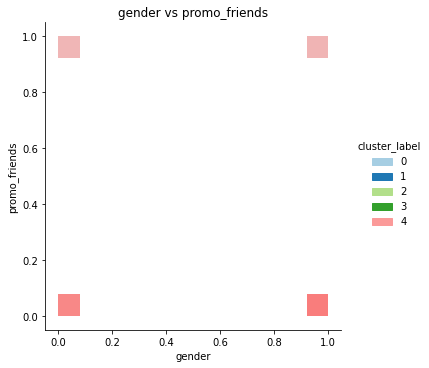

<Figure size 360x360 with 0 Axes>

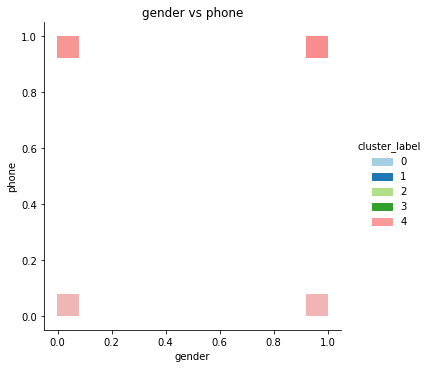

<Figure size 360x360 with 0 Axes>

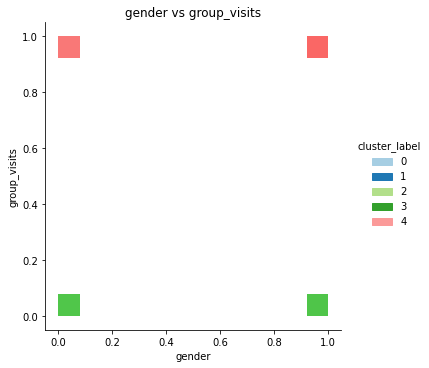

<Figure size 360x360 with 0 Axes>

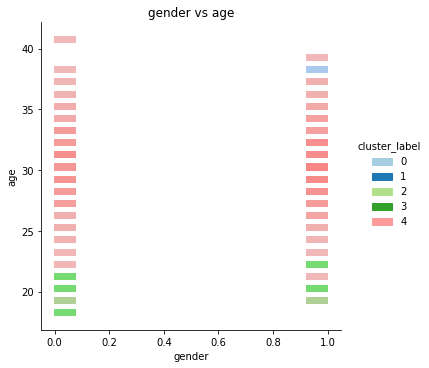

<Figure size 360x360 with 0 Axes>

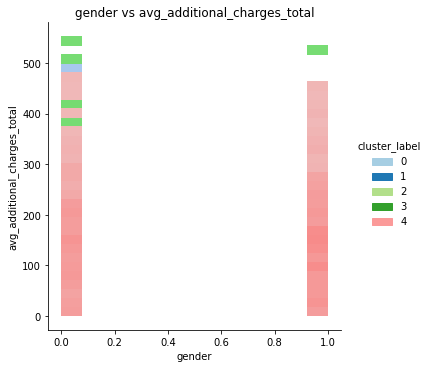

<Figure size 360x360 with 0 Axes>

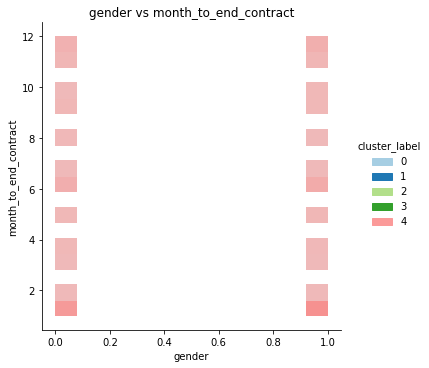

<Figure size 360x360 with 0 Axes>

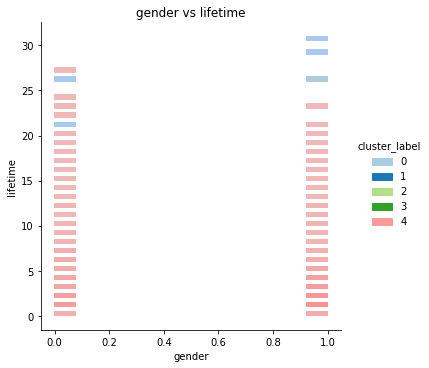

<Figure size 360x360 with 0 Axes>

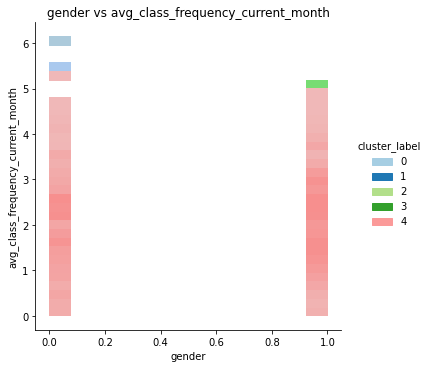

<Figure size 360x360 with 0 Axes>

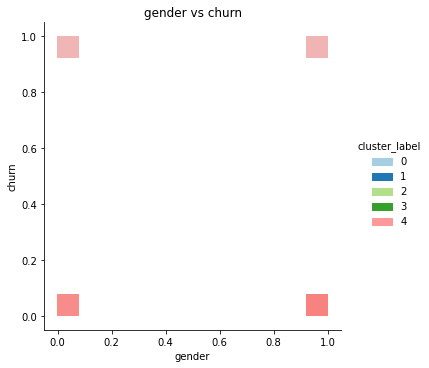

<Figure size 360x360 with 0 Axes>

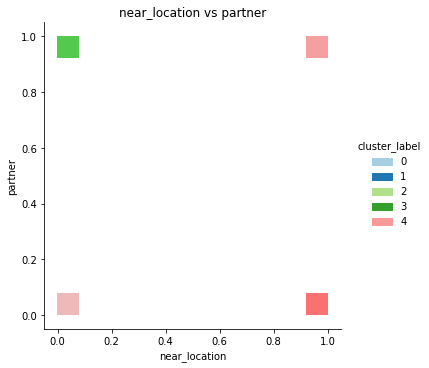

<Figure size 360x360 with 0 Axes>

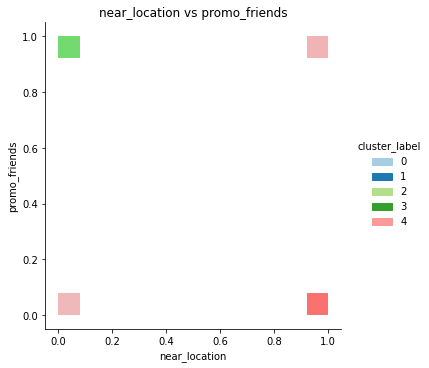

<Figure size 360x360 with 0 Axes>

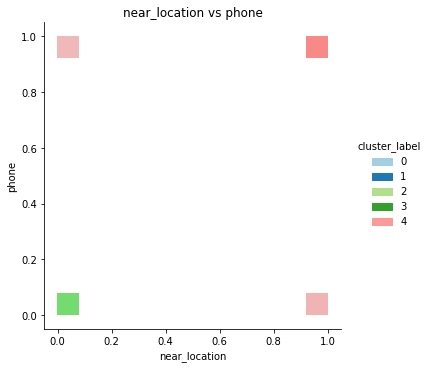

<Figure size 360x360 with 0 Axes>

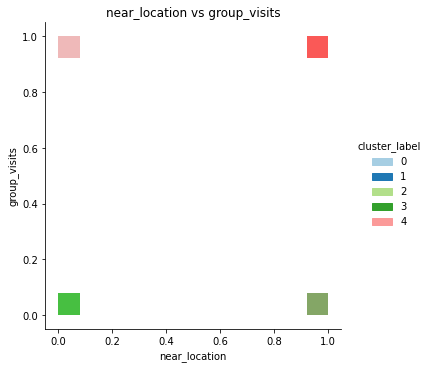

<Figure size 360x360 with 0 Axes>

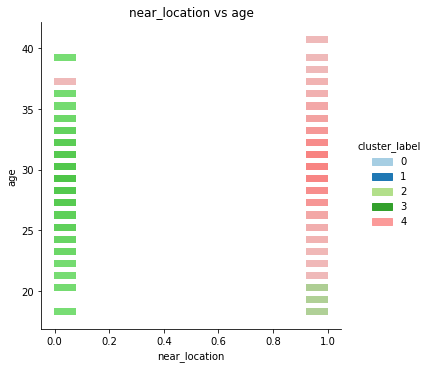

<Figure size 360x360 with 0 Axes>

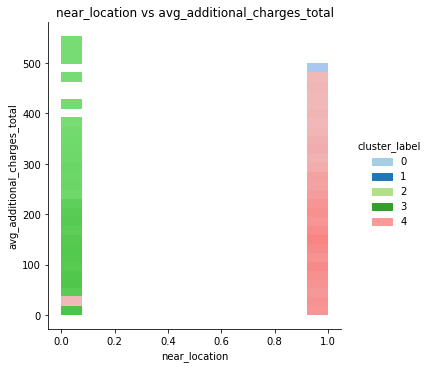

<Figure size 360x360 with 0 Axes>

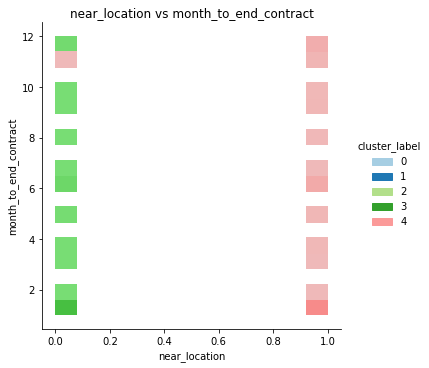

<Figure size 360x360 with 0 Axes>

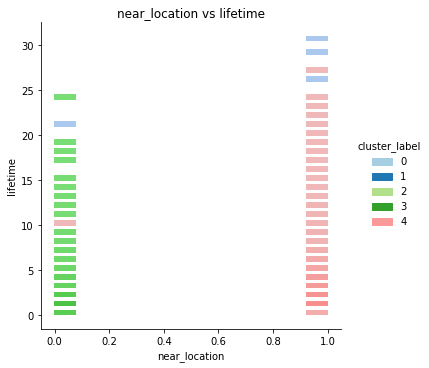

<Figure size 360x360 with 0 Axes>

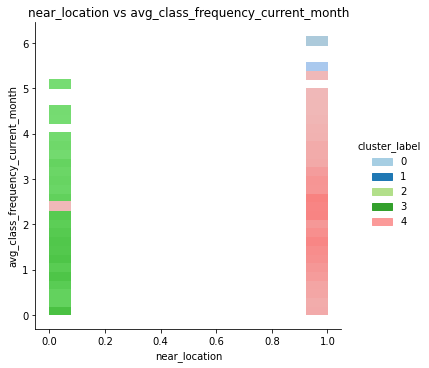

<Figure size 360x360 with 0 Axes>

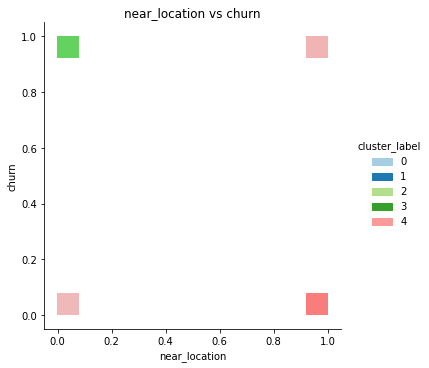

<Figure size 360x360 with 0 Axes>

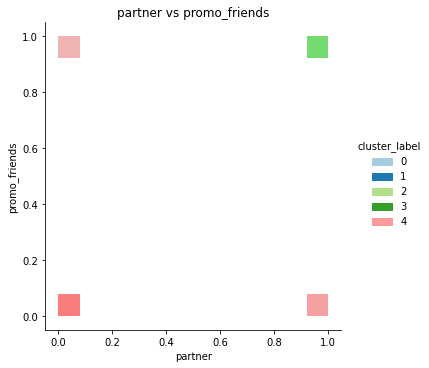

<Figure size 360x360 with 0 Axes>

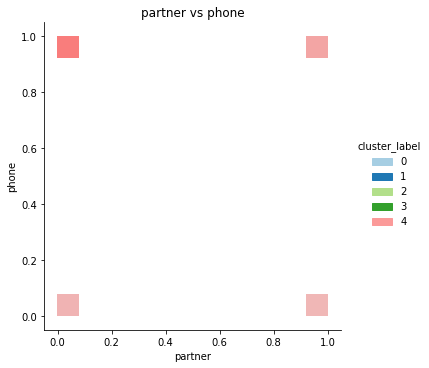

<Figure size 360x360 with 0 Axes>

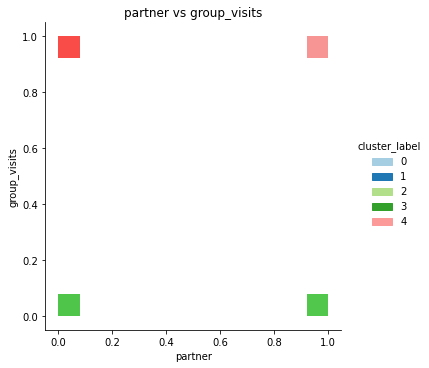

<Figure size 360x360 with 0 Axes>

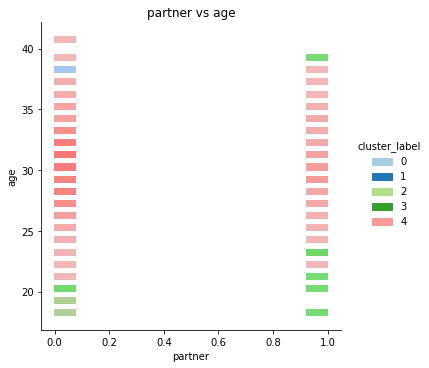

<Figure size 360x360 with 0 Axes>

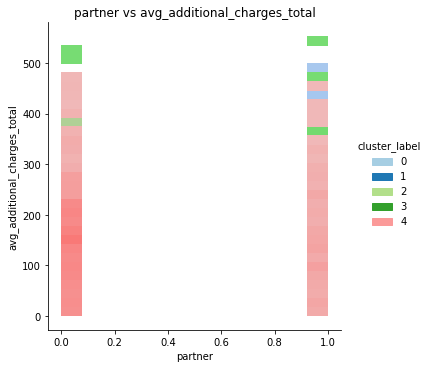

<Figure size 360x360 with 0 Axes>

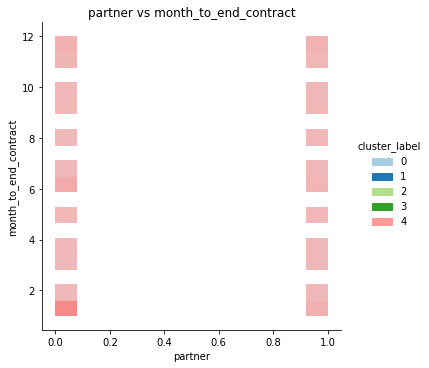

<Figure size 360x360 with 0 Axes>

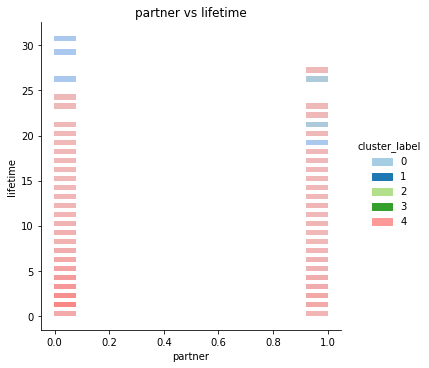

<Figure size 360x360 with 0 Axes>

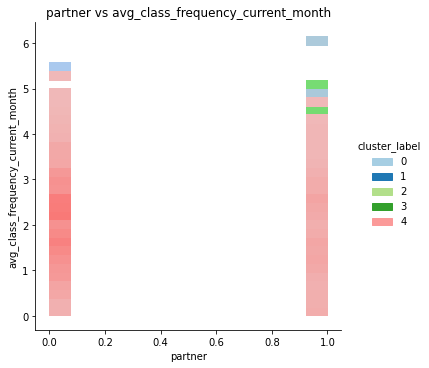

<Figure size 360x360 with 0 Axes>

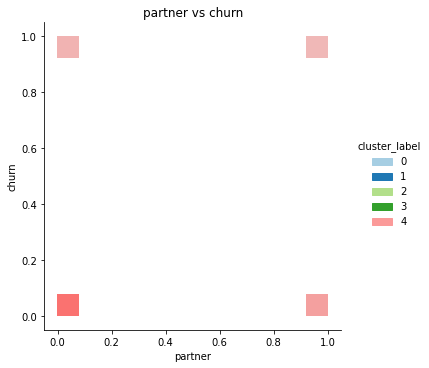

<Figure size 360x360 with 0 Axes>

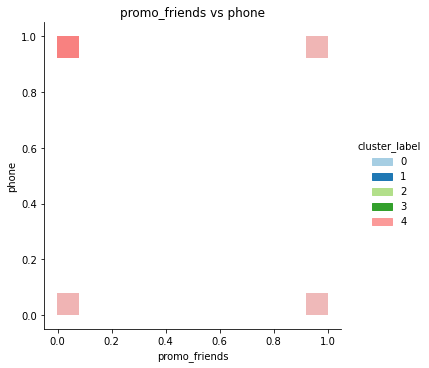

<Figure size 360x360 with 0 Axes>

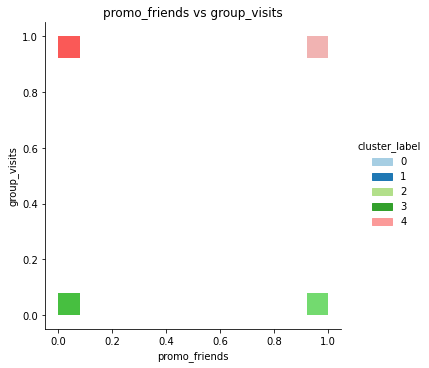

<Figure size 360x360 with 0 Axes>

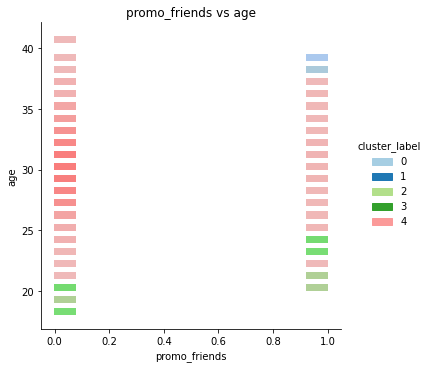

<Figure size 360x360 with 0 Axes>

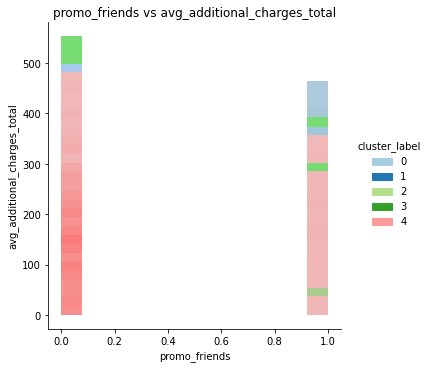

<Figure size 360x360 with 0 Axes>

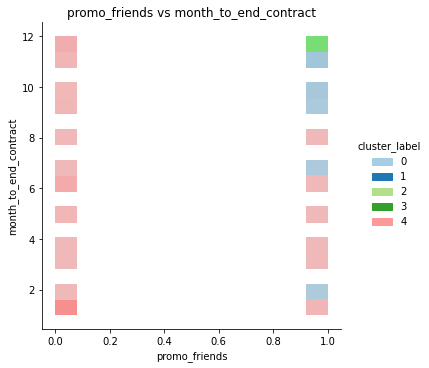

<Figure size 360x360 with 0 Axes>

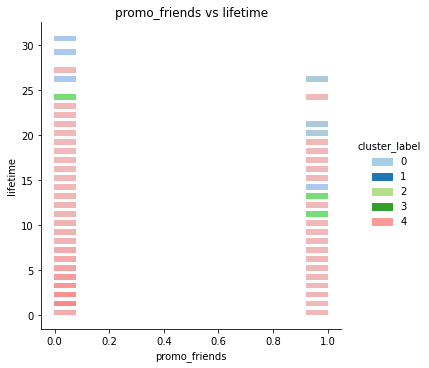

<Figure size 360x360 with 0 Axes>

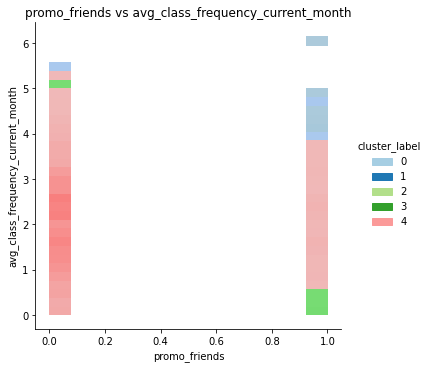

<Figure size 360x360 with 0 Axes>

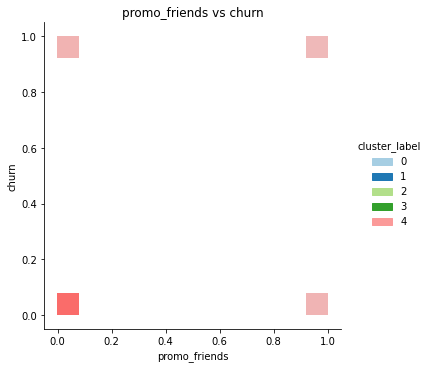

<Figure size 360x360 with 0 Axes>

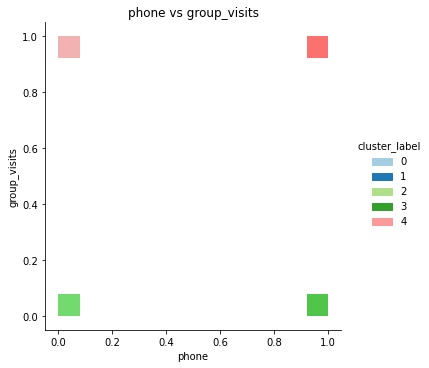

<Figure size 360x360 with 0 Axes>

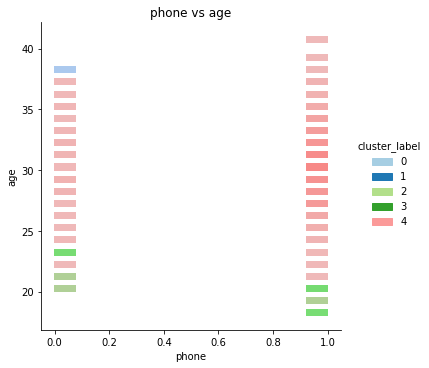

<Figure size 360x360 with 0 Axes>

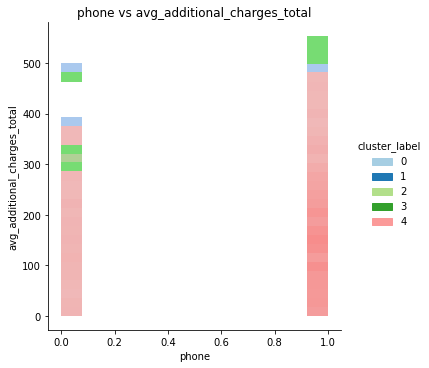

<Figure size 360x360 with 0 Axes>

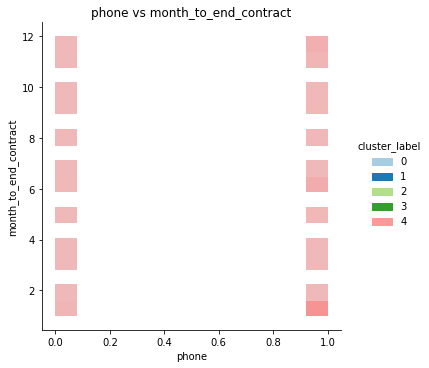

<Figure size 360x360 with 0 Axes>

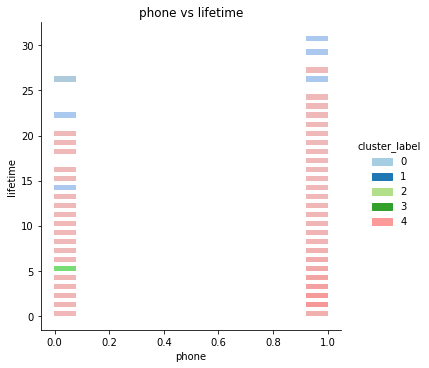

<Figure size 360x360 with 0 Axes>

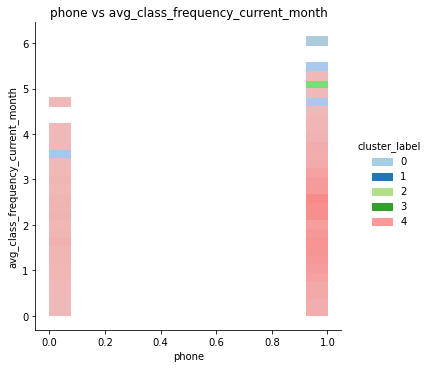

<Figure size 360x360 with 0 Axes>

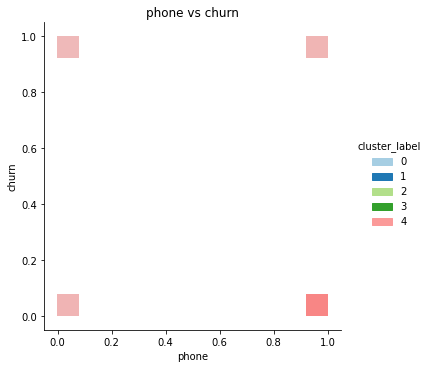

<Figure size 360x360 with 0 Axes>

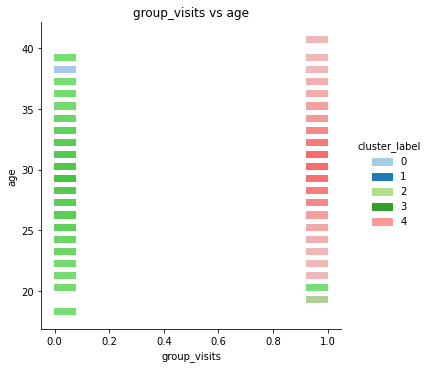

<Figure size 360x360 with 0 Axes>

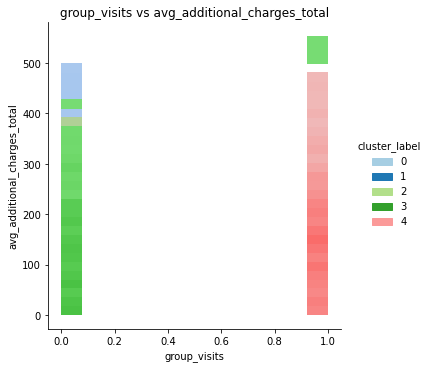

<Figure size 360x360 with 0 Axes>

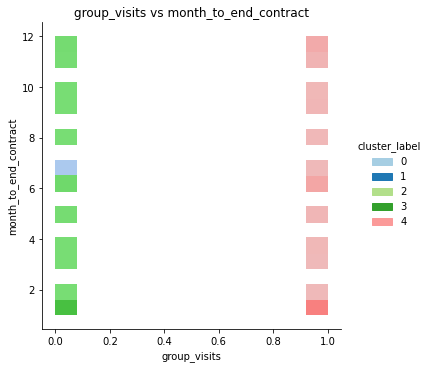

<Figure size 360x360 with 0 Axes>

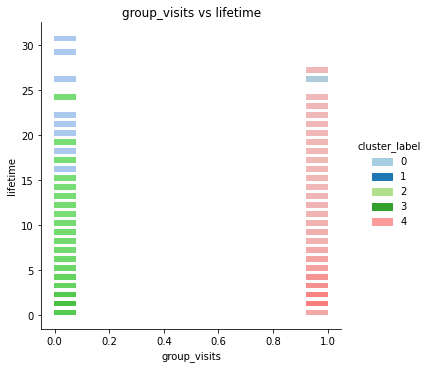

<Figure size 360x360 with 0 Axes>

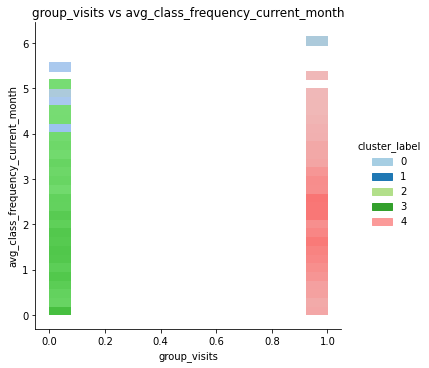

<Figure size 360x360 with 0 Axes>

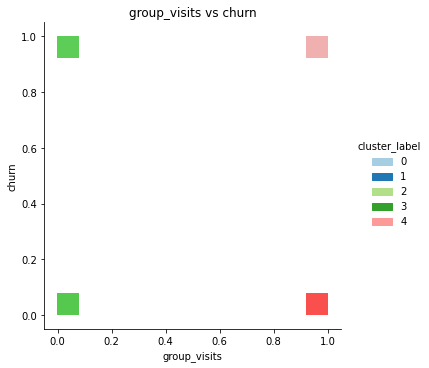

<Figure size 360x360 with 0 Axes>

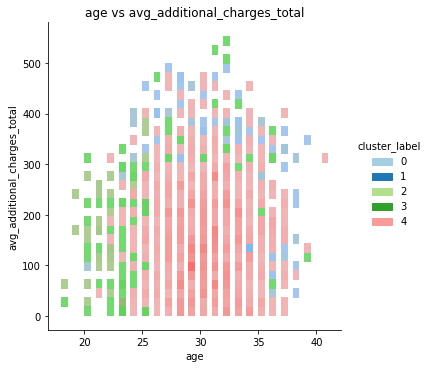

<Figure size 360x360 with 0 Axes>

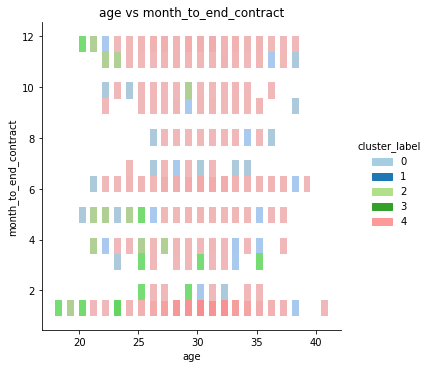

<Figure size 360x360 with 0 Axes>

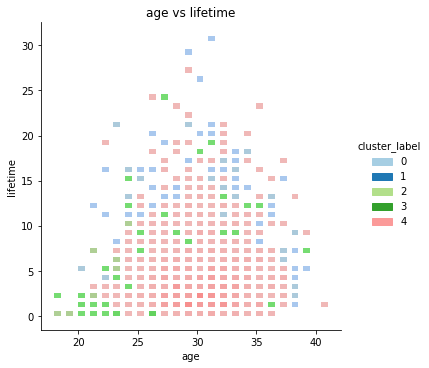

<Figure size 360x360 with 0 Axes>

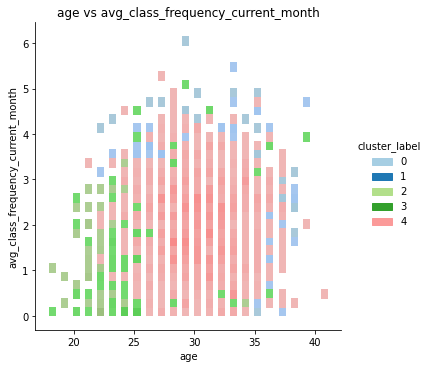

<Figure size 360x360 with 0 Axes>

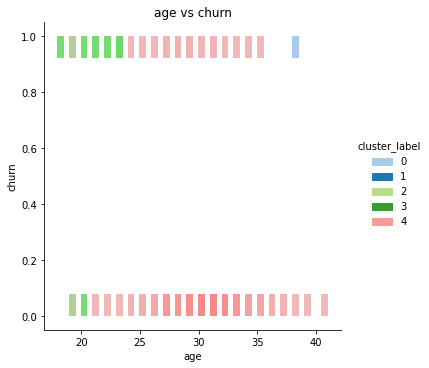

<Figure size 360x360 with 0 Axes>

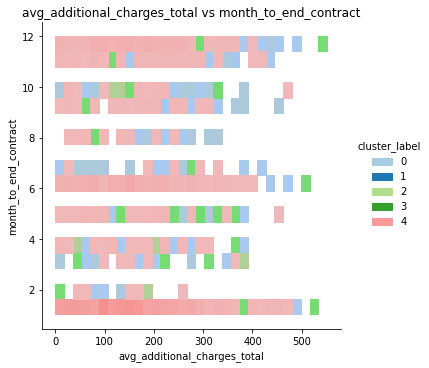

<Figure size 360x360 with 0 Axes>

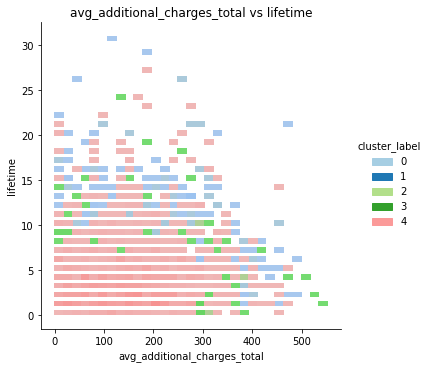

<Figure size 360x360 with 0 Axes>

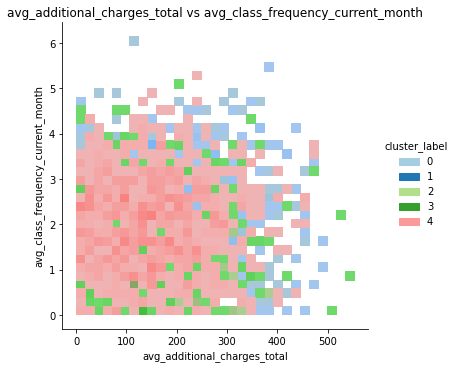

<Figure size 360x360 with 0 Axes>

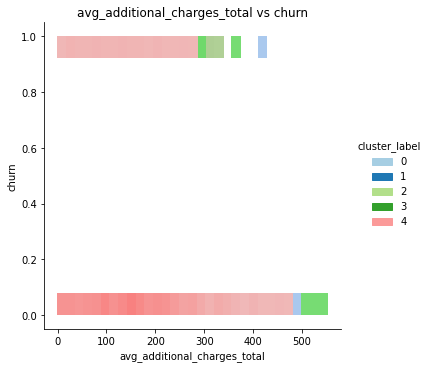

<Figure size 360x360 with 0 Axes>

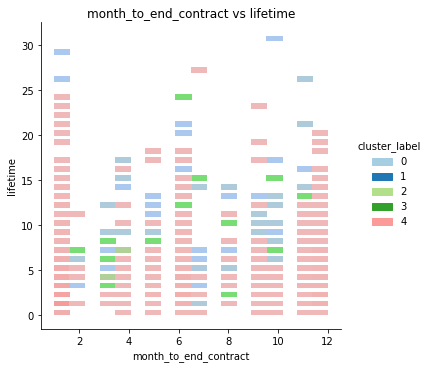

<Figure size 360x360 with 0 Axes>

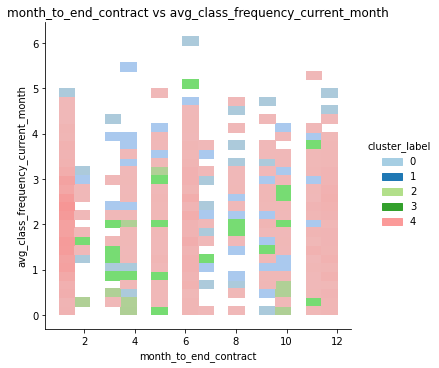

<Figure size 360x360 with 0 Axes>

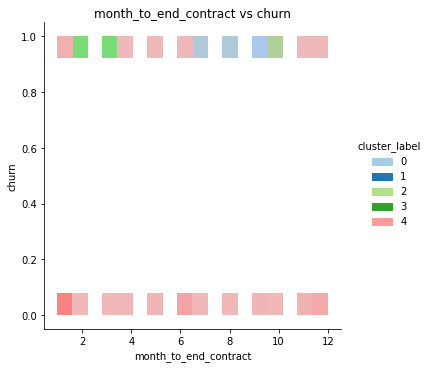

<Figure size 360x360 with 0 Axes>

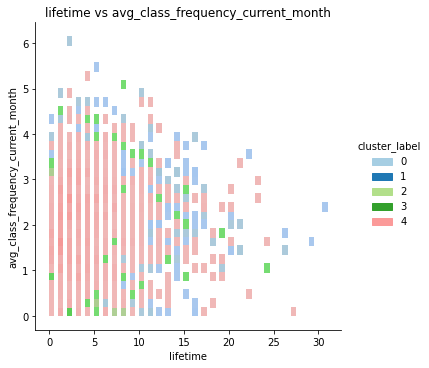

<Figure size 360x360 with 0 Axes>

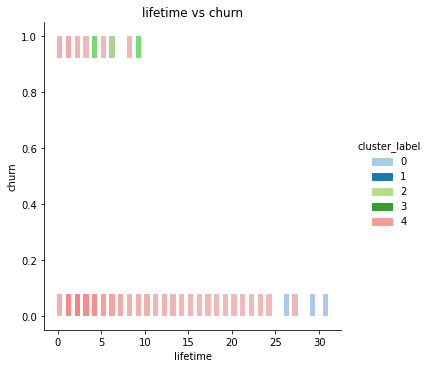

<Figure size 360x360 with 0 Axes>

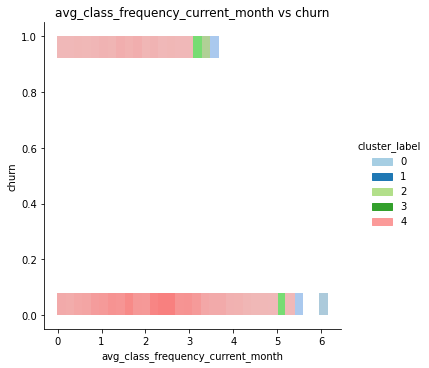

In [65]:
for pair in col_pairs:
    show_clusters_on_displot(gym, pair[0], pair[1], 'cluster_label')

<a id="conclusion"> </a>
# 4. Вывод

<b>Предобработка.</b>

В имеющемся датасете 4000 строк, 14 столбцов, большая часть переменных - бинарные категориальные. Пропущенных значений - нет. Явных дубликатов - нет. Типы данных соответствуют действительности. Так же мы изменили стиль написания стообцов с pascal case на snake case.


<b>Распределение признаков.</b>

Проанализировав целевую переменную, мы выяснили, что выборка несбалансированная - соотношение активных пользователей к ушедшим 3:1.

Сгруппировав средние значения признаков по классам (0 и 1), мы выяснили, что:
1. соотношение мужчин и женщин - практически поровну;
2. клиенты реже проживают рядом с спортзалом;
3. клиенты реже покупают абонемент в рамках акции «приведи друга» и реже являются сотрудниками компании-партнёра клуба;
4. реже покупают абонементы на длительные периоды времени, реже посещают спортзал и реже, чем активные пользвователи, посещают групповые занятия;
5. меньше тратят на кафе, спорттовары, косметический и массажный салон. 

Средние значения возраста, наличия контактного телефона практически совпадают в обоих группах.

<b>Корреляция.</b>

Визуализировав матрицу корреляции, мы видим слабую корреляцию признаков между собой. Сильно коррелируют признаки:
- 'month_to_end_contract' и 'contract_period',
- 'avg_class_frequency_total и 'avg_class_frequency_current_month'. 

Для дальнейшей работы по одному из сильно скоррелированных признаков нужно удалить из выборки.
Остальные переменные либо слабо коррелируют между собой, либо зависимость переменных нелинейна.

Phik-корреляция подтвердила, что переменные month_to_end_contract и contract_period, avg_class_frequency_total и avg_class_frequency_current_month зависимы между собой (> 0.9). Так же она поймала зависимость между 'partner' и 'promo_friends'.

С целевой переменной 'churn' коррелируют:
- 'age',
- 'month_to_end_contract',
- 'lifetime'
- и 'avg_class_frequency_current_month'.

<b>Модель прогнозирования оттока клиентов.</b>

Разделим данные на обучающую и тестовую выборку, стандартизируем признаки.

На предудщем шаге мы выделили две пары признаков, сильно скоррелированных между собой и удалим из пары те признаки, которые не коррелируются с целевой переменной 'churn' - contact_period и avg_class_frequency_total. Так же мы разделили данные на обучающую и тестовую выборку и стандартизировали признаки.

Мы обучили три модели:
- логистическую регрессию,
- RandomForestClassifier
- и CatBoostClassifier - метод, основанный на градиентном бустинге.

По итогам обучения моделей, самую высокую долю правильных ответов (accuracy) показала модель случайного леса, чуть хуже показали себя модели логистической регрессии и Catboost. Но мы помним об изначальном дисбалансе классов (класс 0 и класс 1 - 3 к 1), поэтому будем ориентироваться на оставшиеся метрики.

На имеющихся данных <b>модель логистической регресии показала себя лучше всего</b> (Recall: 0.823, F1 score: 0.807, ROC AUC: 0.963), следом за ней идет CatBoost Classifier (Recall: 0.813, F1 score: 0.807, ROC AUC: 0.958) и RandomForest Classifier (Recall: 0.783, F1 score: 0.803, ROC AUC: 0.948).

<a id="recomend"> </a>
# Рекомендации:

Самые "отточные" кластеры - 2 и 3.
В этих двух кластерах женщин больше, чем мужчин. В остальных кластерах - либо поровну, либо мужчин больше, чем женщин. 

Эти два кластера покупают самые непродолжительные по времени абонементы, реже всех посещают групповые занятия и меньше всего тратят на доп. услуги.

Стратегия удержания - сместить немного фокус внимания на женскую аудиторию. Почему они редко посещают спортзал? Почему они уходят?

Часть женщин рассматривает спортзал не как место для целенаправленного занятия спортом, а как место досуга.

Стоит пересмотреть сетку групповых занятий и включить в них тренировки, направленные на женщин - йога, пилатес. Возможно, стоит задуматься об общеукрепляющих тренировках с громкими названиями -  "готовимся к лету" или "бразильские ягодицы".

Из описания мы поняли, что допуслуги спортзала "культурист-датасаентист" - это "кафе, спорттовары, косметический и массажный салон".

Отточные группы тратят меньше всех,  потому что не находят для себя ничего подходящего - возможно стоит пересмотреть имеющийся ассортимент:
- женщины охотно покупают wellness-БАДы типа спирулины и ягод годжи, а так же средства, "направленные на жиросжигание" (тот же, BCAA);
- ПП блюда и десерты и "бар протеиновых коктейлей" привлекут женскую аудиторию и саботируют жиросжигание (а тут мы с BCAA, как удобно);
- антицеллюлитный и прочий лимфодренажный массаж в массажном кабинете могут так же повысить посещаемость,
- и продажа около-спортивных мелочей может поднять общий чек (например, бутылки для воды, спортивные резинки и массажные ролики).

Так же можно простимулировать отточную группу на покупку абонементов на 6 и 12 месяц - например, как делают многие спортзалы, выдать скидку на 8 марта или 14 февраля ("для милых дам") или запустить акцию-"распрадажу" на полугодовые абонементы на январские праздники ("готовь тело к лету").
